<a href="https://colab.research.google.com/github/MYTHILY7/Data-Analysis-and-Visualization-/blob/main/Drug_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drug=pd.read_csv("/content/drive/MyDrive/drug200 DATASET.csv")

In [ ]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
drug.shape

(200, 6)

In [ ]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
drug.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
print("Max Age:", drug.Age.max())
print("Min Age:", drug.Age.min())

Max Age: 74
Min Age: 15


In [ ]:
drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
print("Max Na_to_K:",drug.Na_to_K.max())
print("Min Na_to_K:",drug.Na_to_K.min())
print("Mean Na_to_K:",drug.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.08448499999999


In [ ]:
drug.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


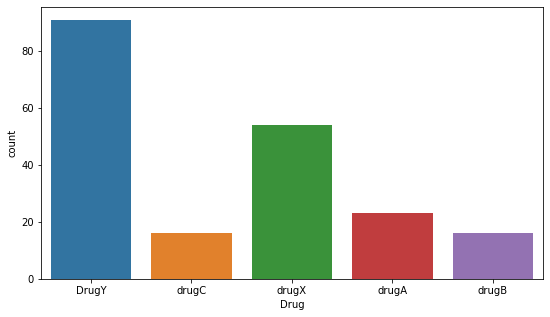

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(drug.Drug)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    drug[y] = le.fit_transform(drug[y])



In [ ]:
drug['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in drug.Na_to_K]
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [ ]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [ ]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


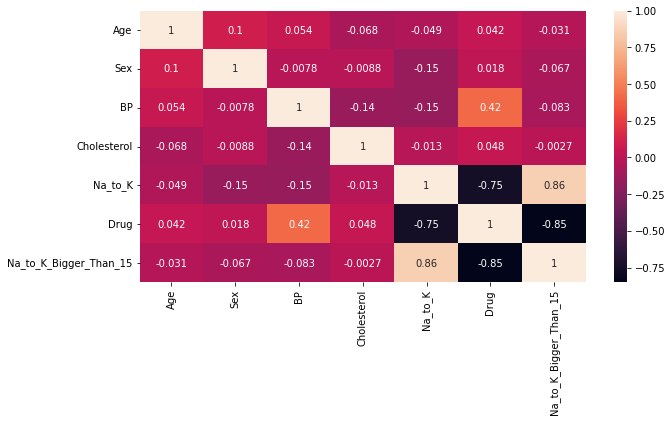

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(drug.corr(),annot=True)
#sns.heatmap(drug.corr())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x = drug.drop(["Drug"],axis=1)
y = drug.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)



x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


In [ ]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
11,34,0,0,1,145,1
110,50,1,0,0,8,0
48,23,1,2,0,188,1
32,49,1,1,1,58,0
111,47,0,2,1,1,0
...,...,...,...,...,...,...
91,41,1,0,1,110,1
62,67,1,1,1,153,1
119,61,0,0,0,169,1
61,24,1,0,1,28,0


In [ ]:
y_train

array([[0],
       [1],
       [0],
       [4],
       [4],
       [0],
       [4],
       [4],
       [4],
       [1],
       [1],
       [4],
       [3],
       [0],
       [0],
       [0],
       [0],
       [4],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [1],
       [4],
       [0],
       [0],
       [4],
       [0],
       [0],
       [3],
       [4],
       [2],
       [0],
       [0],
       [3],
       [4],
       [0],
       [4],
       [0],
       [3],
       [0],
       [0],
       [2],
       [3],
       [0],
       [0],
       [0],
       [0],
       [4],
       [0],
       [2],
       [4],
       [1],
       [1],
       [4],
       [0],
       [0],
       [0],
       [4],
       [0],
       [1],
       [4],
       [4],
       [0],
       [4],
       [1],
       [4],
       [0],
       [0],
       [3],
       [0],
       [4],
       [1],
       [0],
       [0],
       [1],
       [2],
       [4],
       [0],
       [0],
    

In [ ]:
x_test

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_Bigger_Than_15
189,64,1,0,1,155,1
104,22,1,0,1,181,1
64,60,0,0,0,91,0
159,34,0,1,1,87,0
123,36,0,2,0,126,1
18,23,1,1,0,5,0
113,65,0,1,1,95,0
133,24,1,2,0,171,1
179,67,0,2,0,118,1
28,39,0,1,1,159,1


In [ ]:
y_test

array([[0],
       [0],
       [2],
       [4],
       [0],
       [3],
       [4],
       [0],
       [0],
       [0],
       [4],
       [2],
       [0],
       [1],
       [3],
       [4],
       [0],
       [0],
       [3],
       [1],
       [4],
       [0],
       [1],
       [0],
       [0],
       [0],
       [4],
       [2],
       [4],
       [0],
       [1],
       [0],
       [4],
       [0],
       [2],
       [0],
       [1],
       [4],
       [0],
       [0]])

In [ ]:
result_dict_train = {}
result_dict_test = {}

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc=SVC(random_state=42)
accuracies=cross_val_score(svc,x_train,y_train,cv=5)
svc.fit(x_train,y_train)
print("train score:",np.mean(accuracies))
print("test score:",svc.score(x_test,y_test))

train score: 0.7125
test score: 0.7


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
result_dict_train["SVM Default Train Score"]=np.mean(accuracies)
result_dict_test["SVM Deafult Test Score"]=svc.score(x_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Train Score: 0.9875
Test Score: 1.0


In [ ]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.65625
Test Score: 0.575


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

In [ ]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train


,Score
SVM Default Train Score,0.71250
Random Forest Default Train Score,0.98750
KNN Default Train Score,0.65625


In [ ]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
SVM Deafult Test Score,0.700
Random Forest Default Test Score,1.000
KNN Default Test Score,0.575


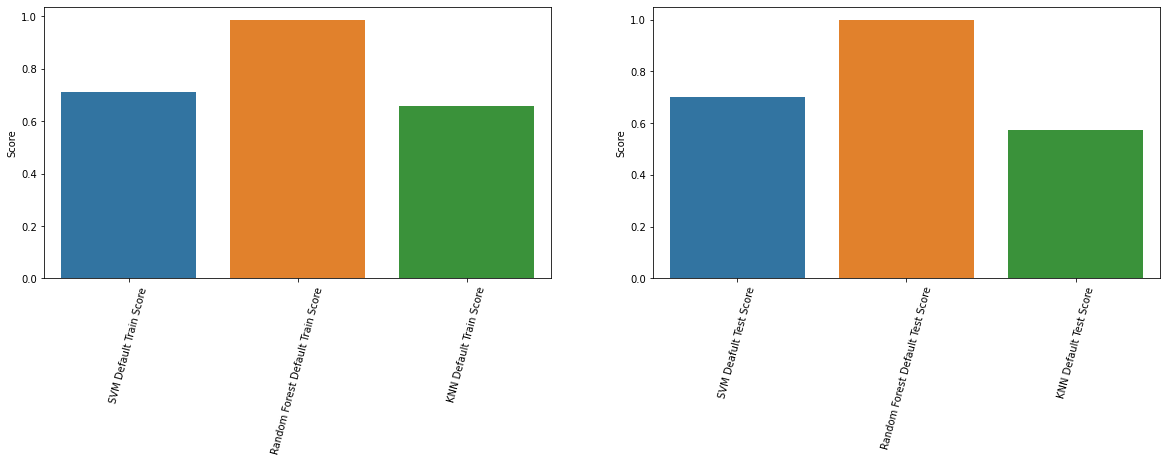

In [ ]:



fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: ignored

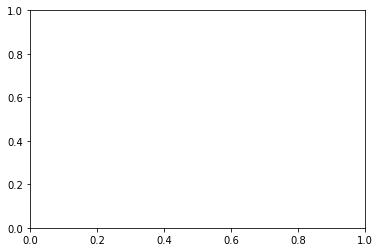

In [ ]:
import matplotlib.pyplot as plt

#x  = [RANDOMFOREST,KNEARESTNEIGHBOURS,SUPPORTVECTORMACHINE]
x  = [rfc,knn,svc]
y = [98,65,71]

plt.plot(x, y, label="1.RF,2.KNN,3.SVM")
plt.plot()
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Prediction")
plt.legend()
plt.show()